## Project Overview

In this project, we aimed to analyze historical rainfall data, identify seasonal patterns such as the monsoon season, and forecast future rainfall trends using a time series analysis approach.

### Key Steps in the Project:
1. **Data Fetching and Preprocessing**: We fetched historical rainfall data using the Meteostat API for the period from 2000 to 2021. The data was cleaned by removing missing values, outliers, and converting the 'Date' column into a proper datetime format.
   
2. **Exploratory Data Analysis (EDA)**: We visualized the rainfall data over different time intervals (daily, monthly, and yearly) to identify patterns and trends. We also highlighted the monsoon season based on average rainfall during specific months.

3. **Monsoon Season Detection**: Using the rainfall data, we identified the monsoon months for the given location. This was done by calculating the average rainfall for each month and identifying the months with the highest rainfall.

4. **Time Series Forecasting**: Using the SARIMA (Seasonal AutoRegressive Integrated Moving Average) model, we performed a forecast of future rainfall. The model was trained on the historical data from 2000 to 2019 and used to predict future rainfall for the next few years.

5. **Visualization**: The forecasted rainfall was compared to the actual rainfall data, with special attention given to highlighting the monsoon season. The forecast was also split into monsoon and non-monsoon seasons.

---


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [7]:
def load_csv(directory):
    all_dfs = []
    for file in os.listdir(directory):
        if file.endswith(".csv"):
            file_path = os.path.join(directory, file)
            df = pd.read_csv(file_path)
            all_dfs.append(df)
    return pd.concat(all_dfs, ignore_index=True) 

# Usage
data_directory = "../Data/"  
df = load_csv(data_directory)

In [8]:
df

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2000-01-01,25.4,NaN,33.9,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-02,26.3,18.6,33.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-03,25.9,NaN,33.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-04,25.9,17.5,33.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-05,26.3,18.0,33.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9149,2025-01-18,28.2,25.0,33.0,0.0,NaN,50.0,8.5,NaN,1011.7,NaN
9150,2025-01-19,27.9,23.0,33.0,0.0,NaN,72.0,7.0,NaN,1012.5,NaN
9151,2025-01-20,27.3,22.0,33.0,0.0,NaN,46.0,5.9,NaN,1011.8,NaN
9152,2025-01-21,25.6,21.1,31.2,0.0,NaN,349.0,1.9,NaN,1011.2,NaN


# Rename columns

In [58]:
df.rename(columns={
    'time': 'Date',
    'tavg': 'Avg_Temperature',
    'tmin': 'Min_Temperature',
    'tmax': 'Max_Temperature',
    'prcp': 'Rainfall',
    'snow': 'Snowfall',
    'wdir': 'Wind_Direction',
    'wspd': 'Wind_Speed',
    'wpgt': 'Wind_Gust',
    'pres': 'Pressure',
    'tsun': 'Sunshine'
}, inplace=True)

In [ ]:
df

,Date,Avg_Temperature,Min_Temperature,Max_Temperature,Rainfall,Snowfall,Wind_Direction,Wind_Speed,Wind_Gust,Pressure,Sunshine
0,2000-01-01,25.4,NaN,33.9,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-02,26.3,18.6,33.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-03,25.9,NaN,33.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-04,25.9,17.5,33.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-05,26.3,18.0,33.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9149,2025-01-18,28.2,25.0,33.0,0.0,NaN,50.0,8.5,NaN,1011.7,NaN
9150,2025-01-19,27.9,23.0,33.0,0.0,NaN,72.0,7.0,NaN,1012.5,NaN
9151,2025-01-20,27.3,22.0,33.0,0.0,NaN,46.0,5.9,NaN,1011.8,NaN
9152,2025-01-21,25.6,21.1,31.2,0.0,NaN,349.0,1.9,NaN,1011.2,NaN


wee need only column `Date` and `Rainfall`

# Keep Only 'Date' and 'Rainfall' columns

In [60]:
df = df[['Date', 'Rainfall']]


In [61]:
df

,Date,Rainfall
0,2000-01-01,0.0
1,2000-01-02,0.0
2,2000-01-03,0.0
3,2000-01-04,0.0
4,2000-01-05,0.0
...,...,...
9149,2025-01-18,0.0
9150,2025-01-19,0.0
9151,2025-01-20,0.0
9152,2025-01-21,0.0


# Drop Rows With Missing 'prcp' Values

In [62]:
df.dropna(subset=['Rainfall'], inplace=True)

C:\Users\sanjay\AppData\Local\Temp\ipykernel_11728\1988557930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Rainfall'], inplace=True)


# Convert 'Date' Column To datetime

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
# Set 'Date' as the index
df.set_index('Date', inplace=True)

C:\Users\sanjay\AppData\Local\Temp\ipykernel_11728\2365077377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


# Remove Zero Values From 'Rainfall' Column

In [64]:
df = df[df['Rainfall'] > 0.0]

# Fill Any Remaining Missing Values With Backfill

In [ ]:
df.fillna(method='bfill', inplace=True)

C:\Users\sanjay\AppData\Local\Temp\ipykernel_11728\3314729575.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)
C:\Users\sanjay\AppData\Local\Temp\ipykernel_11728\3314729575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(method='bfill', inplace=True)


# Plot The Box Plot With Outliers

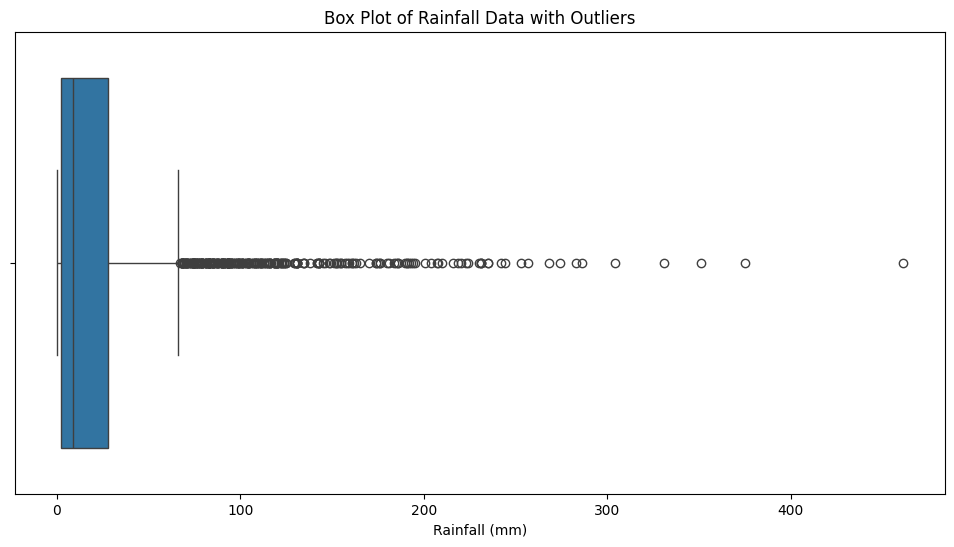

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Rainfall'])
plt.title("Box Plot of Rainfall Data with Outliers")
plt.xlabel("Rainfall (mm)")
plt.show()

# Detect And Remove Outliers Using IQR

C:\Users\sanjay\AppData\Local\Temp\ipykernel_11728\3684866651.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df[~outlier_condition]


Number of outliers before removal: 283
Number of outliers removed: 283


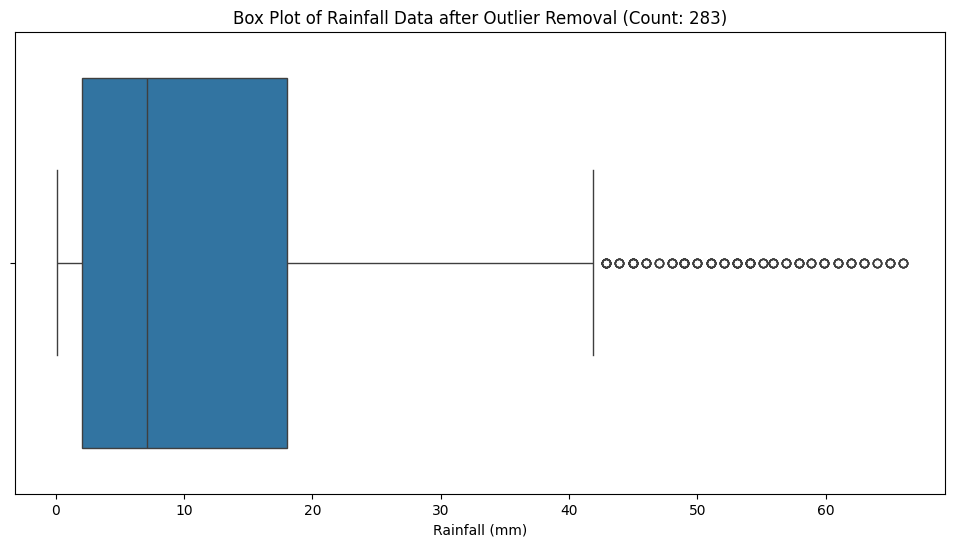

In [ ]:
# Calculate the number of rows before removing outliers
initial_count = len(df)

# Calculate Q1, Q3, and IQR
Q1 = df['Rainfall'].quantile(0.25)
Q3 = df['Rainfall'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (df['Rainfall'] < (Q1 - 1.5 * IQR)) | (df['Rainfall'] > (Q3 + 1.5 * IQR))
df = df[~outlier_condition]

# Count the number of outliers before removal
outliers_count_before = outlier_condition.sum()

# Remove outliers
df_cleaned = df[~outlier_condition]

# Calculate the number of rows after removing outliers
final_count = len(df_cleaned)

# Calculate the number of outliers removed
outliers_removed = initial_count - final_count

print(f"Number of outliers before removal: {outliers_count_before}")
print(f"Number of outliers removed: {outliers_removed}")

# Plot the box plot after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_cleaned['Rainfall'])
plt.title(f"Box Plot of Rainfall Data after Outlier Removal (Count: {outliers_removed})")
plt.xlabel("Rainfall (mm)")
plt.show()


# Visualize raw rainfall data

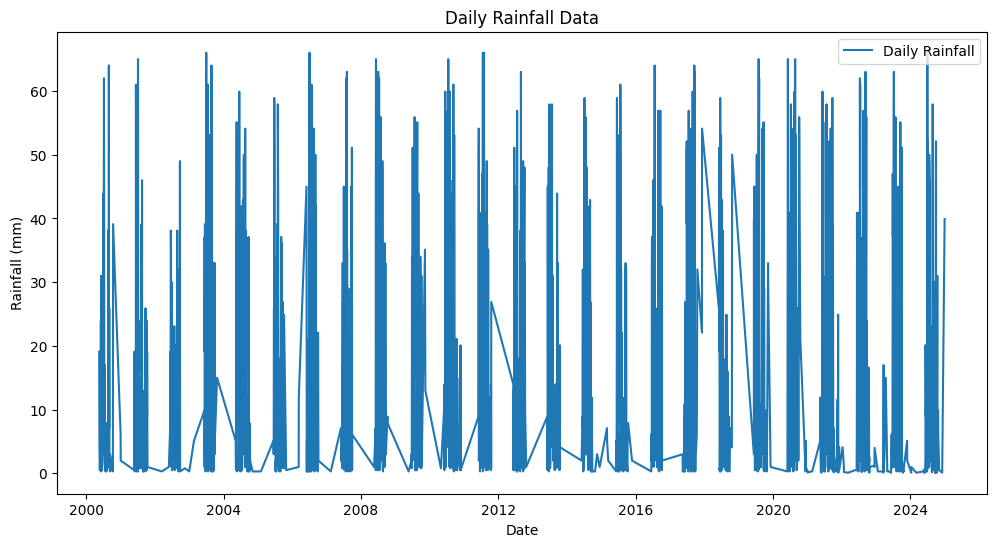

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Rainfall'], label='Daily Rainfall')
plt.title("Daily Rainfall Data")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.show()

# Resample Data For Monthly, Daily, And Yearly Analysis

In [69]:
df_monthly = df.resample('M').sum()
df_daily = df.resample('D').sum()
df_yearly = df.resample('Y').sum()

# Plot Monthly, Daily, And Yearly Rainfall Trends

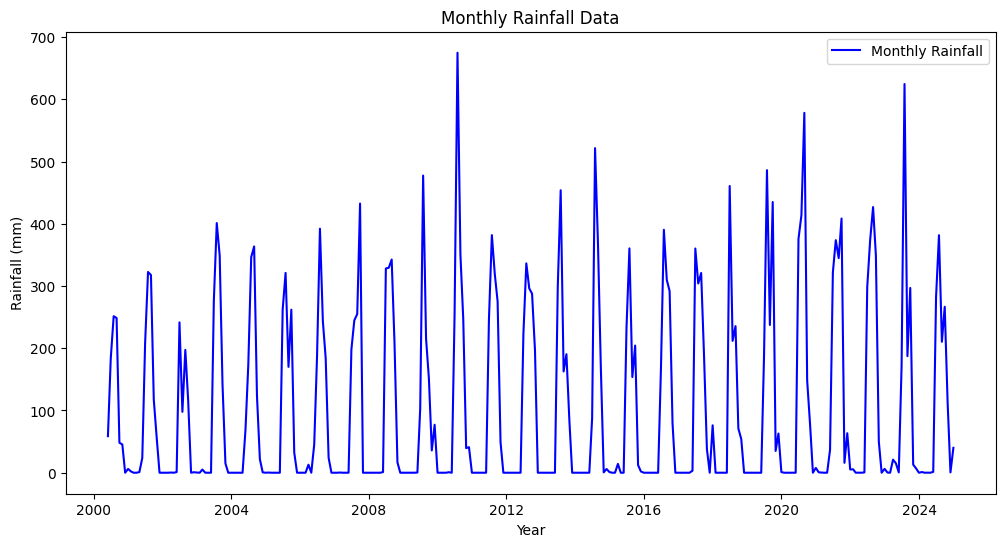

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_monthly['Rainfall'], label='Monthly Rainfall', color='blue')
plt.title("Monthly Rainfall Data")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.show()

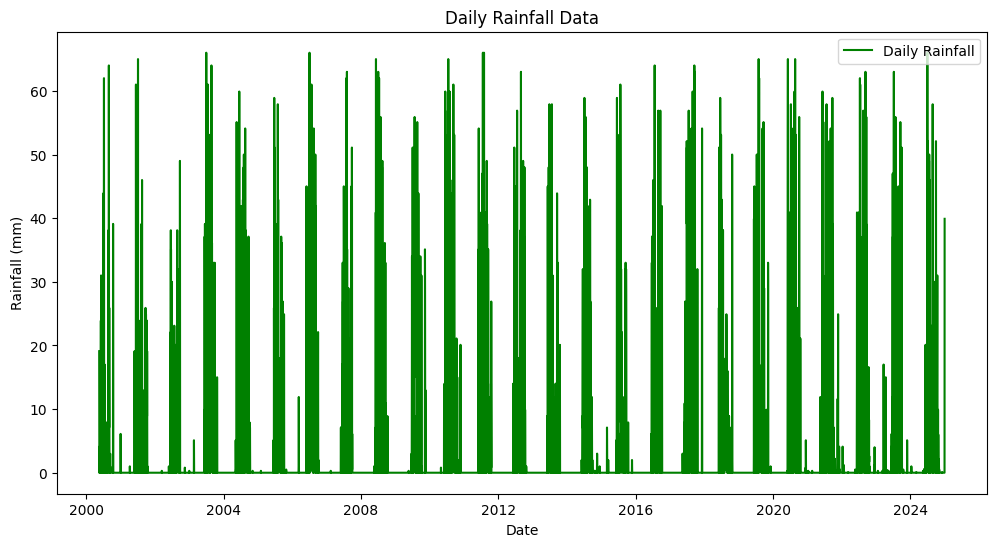

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_daily['Rainfall'], label='Daily Rainfall', color='green')
plt.title("Daily Rainfall Data")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.show()

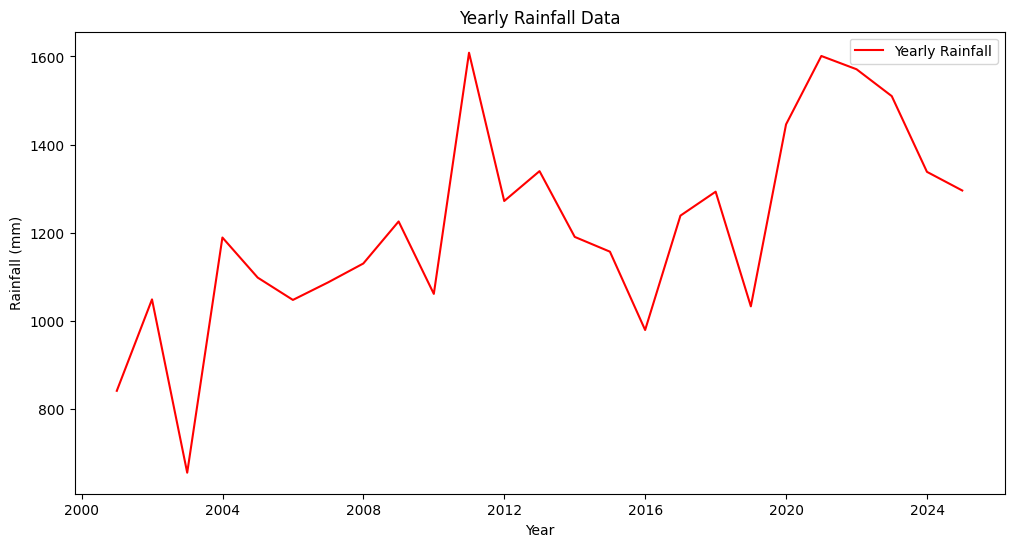

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_yearly['Rainfall'], label='Yearly Rainfall', color='red')
plt.title("Yearly Rainfall Data")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.show()

# Automatically Detect Monsoon Season (Based On Historical Rainfall)
# Calculate Average Rainfall Per Month

In [73]:
monthly_avg_rainfall = df_monthly.groupby(df_monthly.index.month)['Rainfall'].mean()


# Sort Months By Average Rainfall And Select The Top Monthsin

In [74]:
monsoon_months_auto = monthly_avg_rainfall.sort_values(ascending=False).head(4).index

# Highlight Detected Monsoon Months In The Dataset

In [75]:
df_monthly['Monsoon_Season'] = df_monthly.index.month.isin(monsoon_months_auto)


# Visualize The Identified Monsoon Season In The Dataset

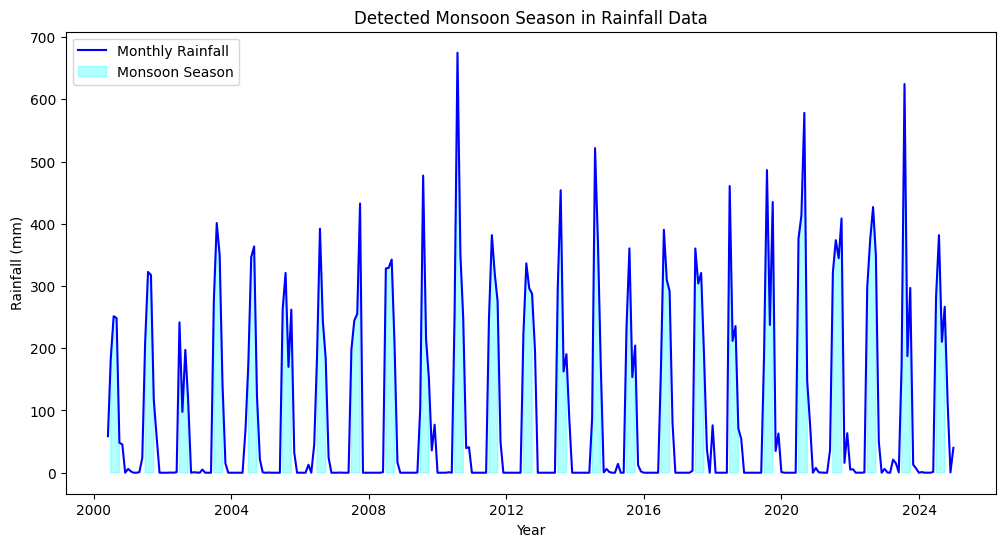

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_monthly['Rainfall'], label='Monthly Rainfall', color='blue')
plt.fill_between(df_monthly.index, df_monthly['Rainfall'], where=df_monthly['Monsoon_Season'], color='cyan', alpha=0.3, label='Monsoon Season')
plt.title("Detected Monsoon Season in Rainfall Data")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.show()

# Display The Monsoon Months

In [77]:
print("Detected Monsoon Months based on rainfall analysis:", monsoon_months_auto)


Detected Monsoon Months based on rainfall analysis: Index([7, 8, 6, 9], dtype='int32', name='Date')


# Train-Test split

# Preparing Data For Modeling

In [78]:
scaler = MinMaxScaler()
df_monthly[['Rainfall_scaled']] = scaler.fit_transform(df_monthly[['Rainfall']])


In [79]:
train_data = df_monthly.loc['2000-01-01':'2019-12-31', ['Rainfall_scaled']]
test_data = df_monthly.loc['2020-01-01':'2021-11-30', ['Rainfall_scaled']]

1. **SARIMAX** is used to handle both the seasonal and non-seasonal components. 
   - The non-seasonal parameters `(5, 1, 0)` are the same as before.
   - The seasonal parameters `(1, 1, 1, 24)` assume a seasonal period of 24 (e.g., daily seasonality over a 24-hour period). Adjust this depending on your data’s frequency.

2. **Forecasting**: the `forecast` function is used to predict the next 48 steps.

# Fit SARIMAX Model

In [80]:
model = SARIMAX(train_data['Rainfall_scaled'],
                order=(5, 1, 0),  # Non-seasonal parameters (p, d, q)
                seasonal_order=(1, 1, 1, 24))  # Seasonal parameters (P, D, Q, s)

# Fit The Model

In [ ]:
model = model.fit()

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Forecast For Future Months Including Monsoon Season

In [82]:
forecast_steps = 48  # Define the number of forecast steps
forecast_scaled = model.forecast(steps=forecast_steps)

# Create A New Scaler For Inverse Transformation Of The Rainfall Column

In [83]:
rainfall_scaler = MinMaxScaler()
rainfall_scaler.fit(df_monthly[['Rainfall']])

MinMaxScaler()

# Inverse Transform The Forecasted Rainfall

In [88]:
forecast_original = rainfall_scaler.inverse_transform(np.array(forecast_scaled).reshape(-1, 1))

# Create DataFrame For Forecasted Data

In [89]:
future_dates = pd.date_range(start='2025-01-31', periods=forecast_steps, freq='M')
predicted_rainfall = pd.DataFrame({'Date': future_dates, 'Rainfall': forecast_original.flatten()})

# Highlight Monsoon Months In Forecast

In [91]:
predicted_rainfall['Monsoon_Season'] = predicted_rainfall['Date'].dt.month.isin(monsoon_months_auto)

# Plot Forecast vs Actual

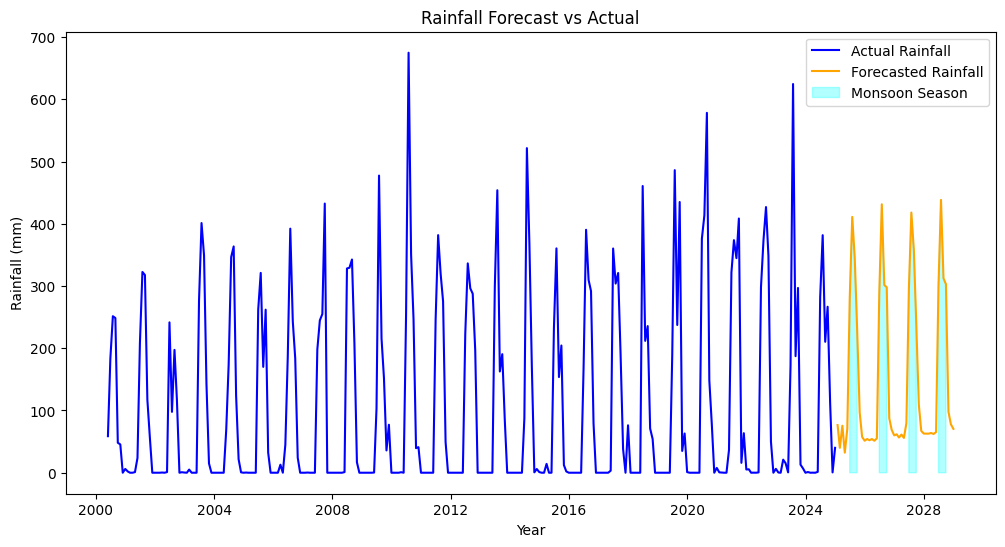

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['Rainfall'], label='Actual Rainfall', color='blue')
plt.plot(predicted_rainfall['Date'], predicted_rainfall['Rainfall'], label='Forecasted Rainfall', color='orange')
plt.fill_between(predicted_rainfall['Date'], predicted_rainfall['Rainfall'], where=predicted_rainfall['Monsoon_Season'], color='cyan', alpha=0.3, label='Monsoon Season')
plt.title("Rainfall Forecast vs Actual")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.show()

# Separate The Predicted_Rainfall DataFrame Into Two DataFrames Based On Monsoon_Season

In [93]:
monsoon_season = predicted_rainfall[predicted_rainfall['Monsoon_Season'] == True]
non_monsoon_season = predicted_rainfall[predicted_rainfall['Monsoon_Season'] == False]

# Display The Separated DataFrames

In [94]:
print("Monsoon Season Data:")
print(monsoon_season)

print("\nNon-Monsoon Season Data:")
print(non_monsoon_season)

Monsoon Season Data:
         Date    Rainfall  Monsoon_Season
5  2025-06-30  280.290143            True
6  2025-07-31  411.013916            True
7  2025-08-31  344.402957            True
8  2025-09-30  228.347642            True
17 2026-06-30  288.248464            True
18 2026-07-31  431.325151            True
19 2026-08-31  301.707147            True
20 2026-09-30  297.961513            True
29 2027-06-30  292.969908            True
30 2027-07-31  418.084108            True
31 2027-08-31  357.506093            True
32 2027-09-30  237.470982            True
41 2028-06-30  299.863962            True
42 2028-07-31  438.390168            True
43 2028-08-31  312.327203            True
44 2028-09-30  303.110696            True

Non-Monsoon Season Data:
         Date    Rainfall  Monsoon_Season
0  2025-01-31   76.561852           False
1  2025-02-28   39.980624           False
2  2025-03-31   75.463846           False
3  2025-04-30   32.302756           False
4  2025-05-31   70.578250    

## Project Conclusion

The project achieved the following:

1. **Monsoon Season Identification**: By analyzing the historical rainfall data, we were able to identify and validate the monsoon season based on the average monthly rainfall. This could be useful for agricultural planning and managing water resources.

2. **Effective Forecasting**: The SARIMA model provided a good forecast of future rainfall, taking into account seasonal patterns, which can be crucial for long-term planning in agriculture, water management, and disaster preparedness.

3. **Data Visualization**: The use of various plots, including daily, monthly, and yearly rainfall data, as well as monsoon season highlights, made it easier to understand the rainfall patterns and trends.

4. **Seasonal Analysis**: The forecast allowed for the separation of monsoon and non-monsoon season data, enabling better understanding of the impact of seasonal changes on rainfall.

---

## Benefits of This Project

- **Improved Planning for Agriculture**: Knowing when the monsoon season is likely to occur can help farmers prepare for planting and harvesting, minimizing crop loss due to unexpected weather changes.
  
- **Water Resource Management**: Understanding rainfall patterns can help authorities plan better water distribution and storage, especially during droughts or floods.

- **Disaster Preparedness**: With accurate forecasting of rainfall trends, governments and organizations can better prepare for potential flooding during the monsoon season.

- **Data-Driven Decision Making**: This analysis equips policymakers, businesses, and individuals with the tools to make informed decisions based on historical and forecasted rainfall patterns.

---

Overall, this project demonstrates the power of data science techniques like time series analysis in understanding and predicting environmental patterns, providing significant benefits in sectors like agriculture, water management, and disaster preparedness.


# 👨‍💻 Developer

This  Project  Was  Developed  And  Built  By  Punjaji  Karhale🚀